In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data",one_hot=True)

Extracting ./mnist/data\train-images-idx3-ubyte.gz
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz


In [5]:
global_step = tf.Variable(0,trainable=False,name='global_step')
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])
with tf.name_scope('layer1'):
    W1 = tf.Variable(tf.random_normal([784,256],stddev=0.01))
    L1 = tf.nn.relu(tf.matmul(X,W1))
with tf.name_scope('layer2'):
    W2 = tf.Variable(tf.random_normal([256,256],stddev=0.01))
    L2 = tf.nn.relu(tf.matmul(L1,W2))
with tf.name_scope('output'):
    W3 = tf.Variable(tf.random_normal([256,10],stddev=0.01))
    model = tf.matmul(L2,W3)

In [7]:
with tf.name_scope('optimizer'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
    optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
    tf.summary.scalar('cost',cost)
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())
ckpt = tf.train.get_checkpoint_state('./model1')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess,ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())

In [13]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_ys})
        total_cost += cost_val
    print('epoch:','%04d' %(epoch+1),'Avg. cost=','{:3f}'.format(total_cost/total_batch))
print('finish')
saver.save(sess,'./model1/mnist.ckpt',global_step = global_step)
is_correct = tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
print('accu:',sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

epoch: 0001 Avg. cost= 0.008440
epoch: 0002 Avg. cost= 0.006982
epoch: 0003 Avg. cost= 0.007967
epoch: 0004 Avg. cost= 0.009626
epoch: 0005 Avg. cost= 0.008150
epoch: 0006 Avg. cost= 0.005022
epoch: 0007 Avg. cost= 0.007698
epoch: 0008 Avg. cost= 0.005277
epoch: 0009 Avg. cost= 0.008176
epoch: 0010 Avg. cost= 0.006585
epoch: 0011 Avg. cost= 0.006015
epoch: 0012 Avg. cost= 0.004318
epoch: 0013 Avg. cost= 0.010232
epoch: 0014 Avg. cost= 0.002684
epoch: 0015 Avg. cost= 0.002279
finish
accu: 0.9804


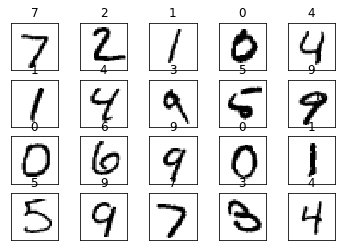

In [16]:
import matplotlib.pyplot as plt
import numpy as np
labels = sess.run(model,feed_dict={X:mnist.test.images,Y:mnist.test.labels})
fig = plt.figure()
for i in range(20):
    subplot = fig.add_subplot(4,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title("%d" % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),cmap=plt.cm.gray_r)
plt.show()